#📌 Extracción

In [1]:
import pandas as pd

In [2]:
datos= pd.read_json('/content/TelecomX_Data.json')
datos


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#🔧 Transformación

In [5]:

# Usamos json_normalize para expandir los diccionarios
df_normalizado = pd.concat([
    datos[['customerID', 'Churn']],
    pd.json_normalize(datos['customer']),
    pd.json_normalize(datos['phone']),
    pd.json_normalize(datos['internet']),
    pd.json_normalize(datos['account'])
], axis=1)

# Mostrar las primeras filas
df_normalizado.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_normalizado.shape

(7267, 21)

In [7]:
##Para saber si tengo valores ausentes o faltantes
df_normalizado.isnull().values.any()

np.False_

In [8]:
#¿cuántos valores ausentes hay por columna?
df_normalizado.isnull().sum()
##Veo que Charges.Total tiene 11 valores ausentes o vacíos.


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
#¿Cuántos valores duplicados tengo?
df_normalizado.duplicated().sum()
#No tengo :)

np.int64(0)

In [10]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
import numpy as np

In [12]:

# Reemplazamos espacios en vacíos y strings vacíos por NaN
#df_normalizado = df_normalizado.replace(r'^\s*$', np.nan, regex=True)


In [13]:
df_normalizado.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [14]:
##Cambio el objeto de Charges.Total por un float64

# Reemplazamos strings o espacios con NaN
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)



In [15]:
# Convertimos la columna a tipo float64
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(np.float64)

In [16]:
##Cambio gender por string
df_normalizado['gender'] = df_normalizado['gender'].str.lower().astype('string')


In [17]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [18]:
# Ver los valores únicos de cada columna
df_normalizado.apply(pd.Series.unique)


,0
customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,"[No, Yes, ]"
gender,"[female, male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[Yes, No]"
tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
PhoneService,"[Yes, No]"
MultipleLines,"[No, Yes, No phone service]"
InternetService,"[DSL, Fiber optic, No]"


In [19]:
##Cambio de nombre a las columnas
# quitar puntos, espacios y poner todo en minúsculas
df_normalizado.columns = df_normalizado.columns.str.replace('.', '', regex=False).str.replace(' ', '').str.lower()
df_normalizado

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [20]:
df_normalizado['paymentmethod'].head(10)

,paymentmethod
0,Mailed check
1,Mailed check
2,Electronic check
3,Electronic check
4,Mailed check
5,Credit card (automatic)
6,Bank transfer (automatic)
7,Credit card (automatic)
8,Electronic check
9,Mailed check


In [21]:
df_normalizado['paymentmethod'].unique()


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [22]:
#Reemplazaré los Nan de la columna de chargestotal por 0
df_normalizado['chargestotal'].fillna(0, inplace=True)


/tmp/ipython-input-1921064591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['chargestotal'].fillna(0, inplace=True)


In [23]:
#¿cuántos valores ausentes hay por columna?
df_normalizado.isnull().sum()
##Y veo que ya no tengo valores ausentes o faltantes

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [24]:
##Ahora me gustaría cambiar las columnas de

In [25]:
df_normalizado.dtypes

,0
customerid,object
churn,object
gender,string[python]
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object


In [26]:
##Ahora hago una lista con las columnas a las cuales me gustaría cambiarles los valores de Yes, No y Sin servicios por
##0 para No, 1 para Yes y 2 para Sin servicios
columns_yesno = ['churn','onlinesecurity', 'partner', 'dependents','phoneservice', 'multiplelines', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv','streamingmovies', 'paperlessbilling']


In [27]:
for col in columns_yesno:
    print(f"\nColumna: {col}")
    print(df_normalizado[col].unique())



Columna: churn
['No' 'Yes' '']

Columna: onlinesecurity
['No' 'Yes' 'No internet service']

Columna: partner
['Yes' 'No']

Columna: dependents
['Yes' 'No']

Columna: phoneservice
['Yes' 'No']

Columna: multiplelines
['No' 'Yes' 'No phone service']

Columna: onlinebackup
['Yes' 'No' 'No internet service']

Columna: deviceprotection
['No' 'Yes' 'No internet service']

Columna: techsupport
['Yes' 'No' 'No internet service']

Columna: streamingtv
['Yes' 'No' 'No internet service']

Columna: streamingmovies
['No' 'Yes' 'No internet service']

Columna: paperlessbilling
['Yes' 'No']


In [28]:
##Eliminar espacios vacios o strings en mi lista de columnas columns_yesno
for col in columns_yesno:
    df_normalizado[col] = df_normalizado[col].astype(str).str.strip().str.lower()


In [29]:
def convertir_yesno(valor):
    if str(valor).strip().lower() == 'no':
        return 0
    elif str(valor).strip().lower() == 'yes':
        return 1
    else:
        return 2

# Aplicar la función a cada columna de la lista
for col in columns_yesno:
    df_normalizado[col] = df_normalizado[col].apply(convertir_yesno)


In [30]:
for col in columns_yesno:
    print(f"\nValores distintos de 'yes' o 'no' en la columna '{col}':")
    print(df_normalizado[df_normalizado[col] == 2][col].value_counts())



Valores distintos de 'yes' o 'no' en la columna 'churn':
churn
2    224
Name: count, dtype: int64

Valores distintos de 'yes' o 'no' en la columna 'onlinesecurity':
onlinesecurity
2    1581
Name: count, dtype: int64

Valores distintos de 'yes' o 'no' en la columna 'partner':
Series([], Name: count, dtype: int64)

Valores distintos de 'yes' o 'no' en la columna 'dependents':
Series([], Name: count, dtype: int64)

Valores distintos de 'yes' o 'no' en la columna 'phoneservice':
Series([], Name: count, dtype: int64)

Valores distintos de 'yes' o 'no' en la columna 'multiplelines':
multiplelines
2    707
Name: count, dtype: int64

Valores distintos de 'yes' o 'no' en la columna 'onlinebackup':
onlinebackup
2    1581
Name: count, dtype: int64

Valores distintos de 'yes' o 'no' en la columna 'deviceprotection':
deviceprotection
2    1581
Name: count, dtype: int64

Valores distintos de 'yes' o 'no' en la columna 'techsupport':
techsupport
2    1581
Name: count, dtype: int64

Valores distintos

In [31]:
df_normalizado

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [32]:
df_normalizado.dtypes

,0
customerid,object
churn,int64
gender,string[python]
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,int64
internetservice,object


In [33]:
# Crear la columna Cuentas_Diarias como mensual / 30
df_normalizado['cuentasdiarias'] = df_normalizado['chargesmonthly'] / 30


In [34]:
df_normalizado.head(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [ ]:
df_normalizado['paymentmethod'].unique()

In [35]:
df_normalizado.dtypes

,0
customerid,object
churn,int64
gender,string[python]
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,int64
internetservice,object


In [36]:
##Guardar mi df en archivo csv
df_normalizado.to_csv('df_clean_Telecom.csv')

#📊 Carga y análisis

In [37]:
df_normalizado.describe()


,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,chargesmonthly,chargestotal,cuentasdiarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.162653,0.484106,0.300124,32.346498,0.902711,0.616348,0.721068,0.779689,0.777900,0.724646,0.819045,0.822623,0.593230,64.720098,2277.182035,2.157337
std,0.528079,0.369074,0.499782,0.458343,24.571773,0.296371,0.656583,0.797706,0.779086,0.779726,0.796705,0.763812,0.762307,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,3.958333


In [38]:
#Buscamos visualizar ahora
import matplotlib.pyplot as plt
import seaborn as sns

**Figura 1.**

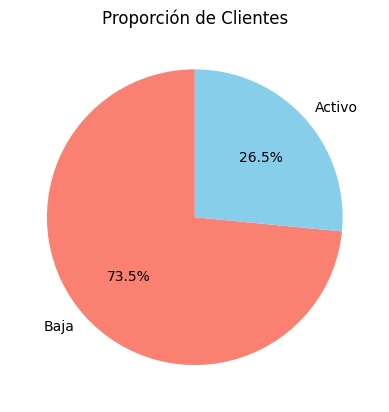

In [39]:
# Contamos los valores de churn y reindexamos para que tenga 0 y 1
churn_counts = df_normalizado['churn'].value_counts().reindex([0, 1], fill_value=0)

# Gráfico de pastel
plt.pie(churn_counts,
        labels=['Baja', 'Activo'],
        autopct='%1.1f%%',
        colors=['salmon', 'skyblue'],
        startangle=90)
plt.title('Proporción de Clientes')
plt.show()

##Y vemos que hay una alta incidencia en las personas que dieron de baja el servicio.. 73.5%

In [40]:
df_normalizado['internetservice'].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
df_normalizado['contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [42]:
df_normalizado['paymentmethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [43]:
df_normalizado = df_normalizado[df_normalizado['churn'].isin([0, 1])]

**Variables Categóricas**

**Figuras 2 .**

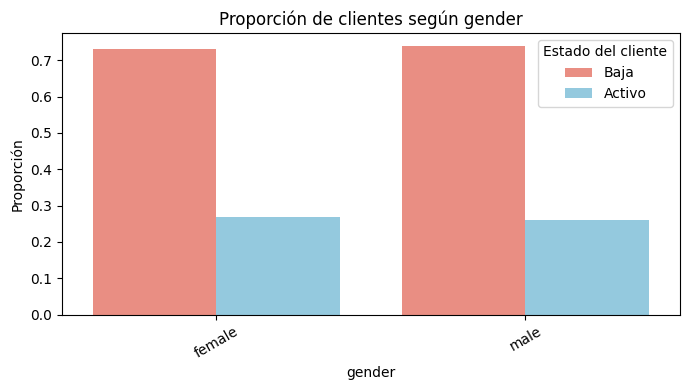

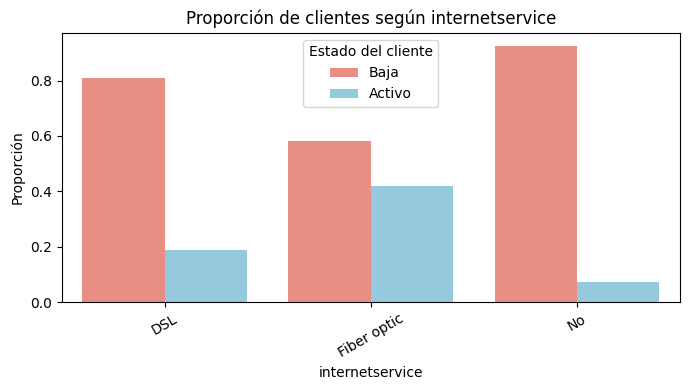

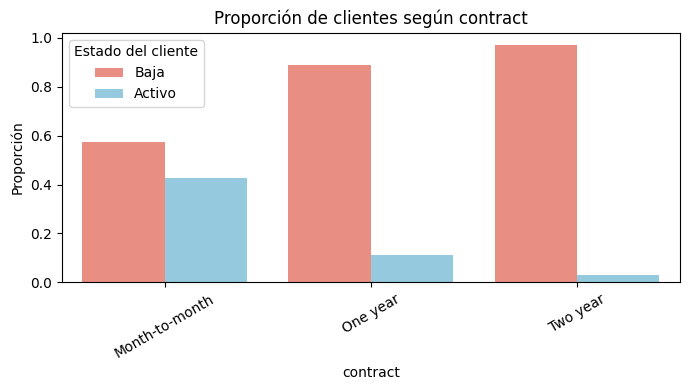

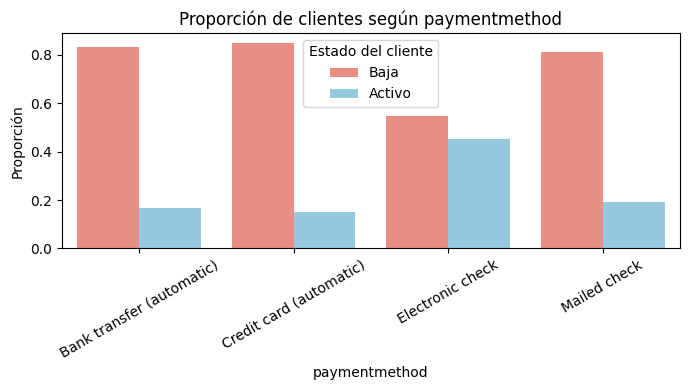

In [47]:
# Variables categóricas a analizar
categorical_cols = ['gender', 'internetservice', 'contract', 'paymentmethod', '']

for col in categorical_cols:
    prop_df = (
        df_normalizado.groupby(col)['churn']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )
    prop_df = prop_df[prop_df['churn'].isin([0, 1])]

    plt.figure(figsize=(7,4))
    ax = sns.barplot(
        x=col, y='proportion', hue='churn',
        data=prop_df,
        palette=['salmon', 'skyblue'],
        hue_order=[0, 1]
    )

    plt.title(f'Proporción de clientes según {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.xticks(rotation=30)

    # Capturamos los handles y labels originales de seaborn
    handles, _ = ax.get_legend_handles_labels()
    # Reemplazamos las etiquetas
    ax.legend(handles, ['Baja', 'Activo'], title='Estado del cliente')

    plt.tight_layout()
    plt.show()


**Variables Numéricas**

**Figura 3 y 4**

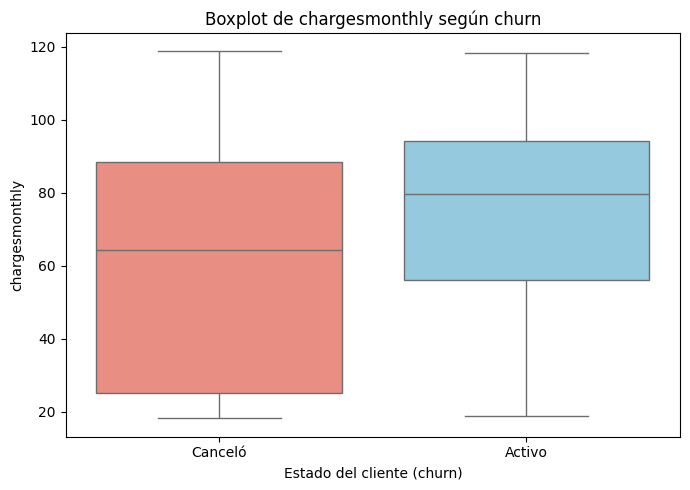

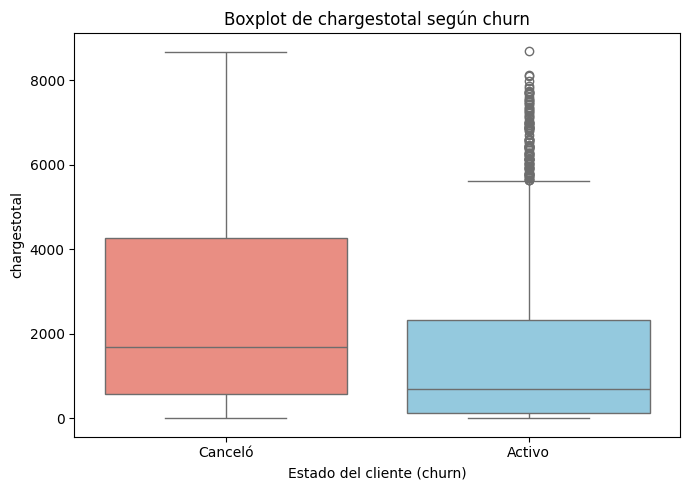

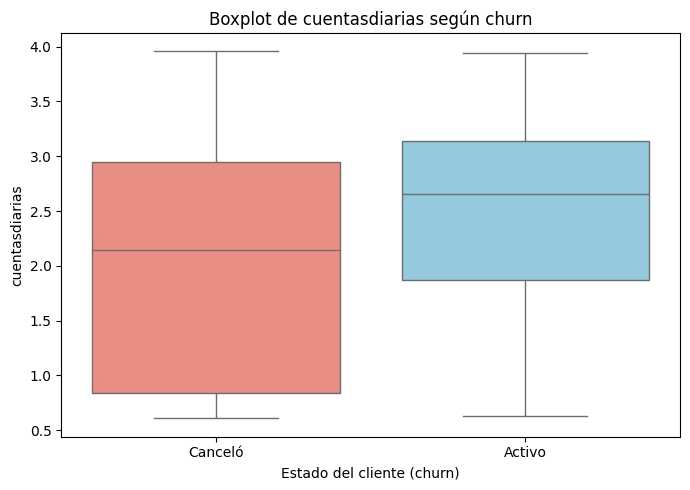

In [52]:
numeric_cols = ['chargesmonthly', 'chargestotal', 'cuentasdiarias']

# Definir un diccionario para colores según churn
palette_dict = {0: "salmon", 1: "skyblue"}

for col in numeric_cols:
    plt.figure(figsize=(7, 5))

    # Añadimos un mapeo de color manual para cada caja con hue:
    sns.boxplot(
        x='churn',
        y=col,
        data=df_normalizado,
        hue='churn',  # ahora sí usamos hue
        palette=palette_dict,
        dodge=False  # para que no duplique boxes
    )

    plt.xlabel('Estado del cliente (churn)')
    plt.xticks([0, 1], ['Canceló', 'Activo'])
    plt.title(f'Boxplot de {col} según churn')

    # Ocultamos la leyenda (opcional)
    plt.legend([],[], frameon=False)

    plt.tight_layout()
    plt.show()


**Figura 5.**

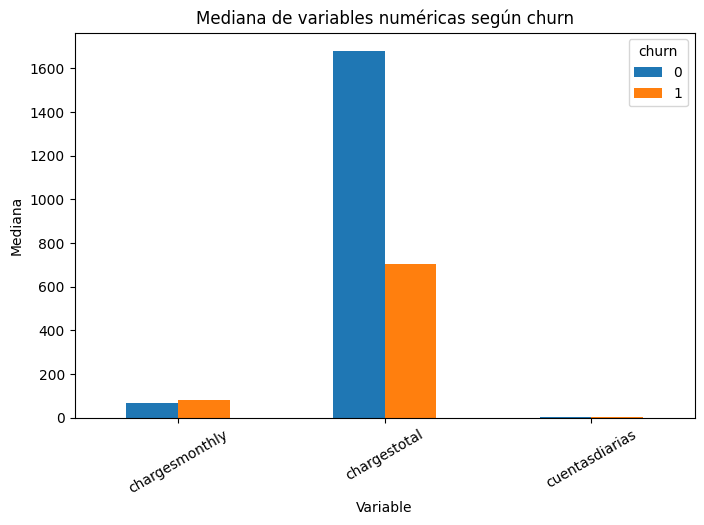

In [54]:
df_normalizado.groupby('churn')[numeric_cols].median().T.plot(kind='bar', figsize=(8,5))
plt.title('Mediana de variables numéricas según churn')
plt.xlabel('Variable')
plt.ylabel('Mediana')
plt.xticks(rotation=30)
plt.show()


En el cargo total, vemos que los clientes que cancelaron estaban pagando más.

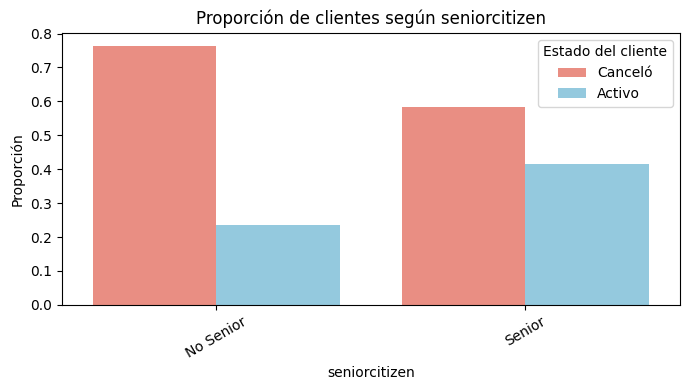

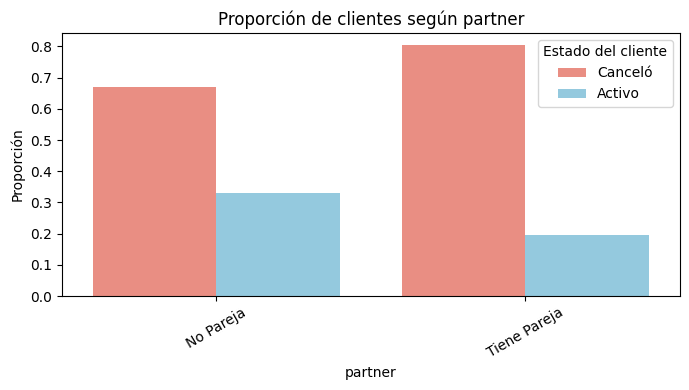

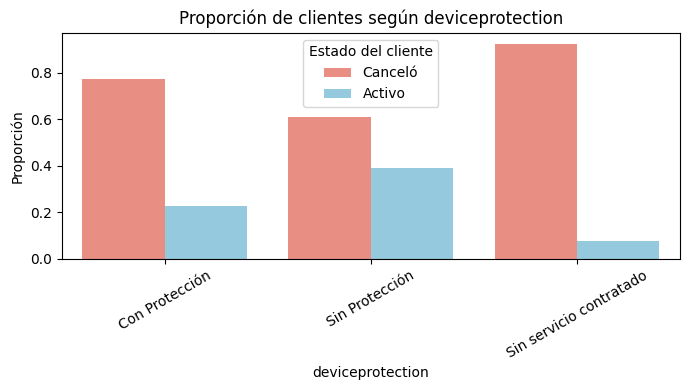

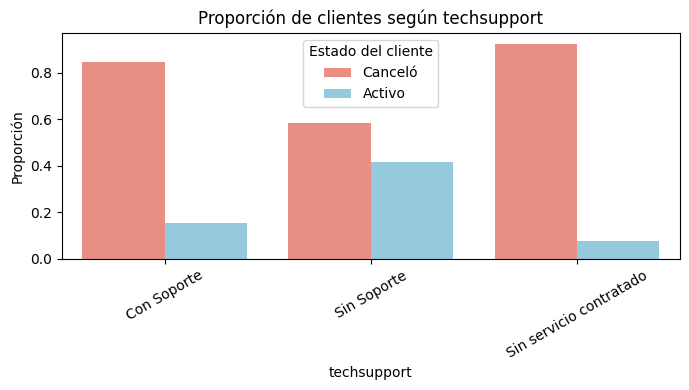

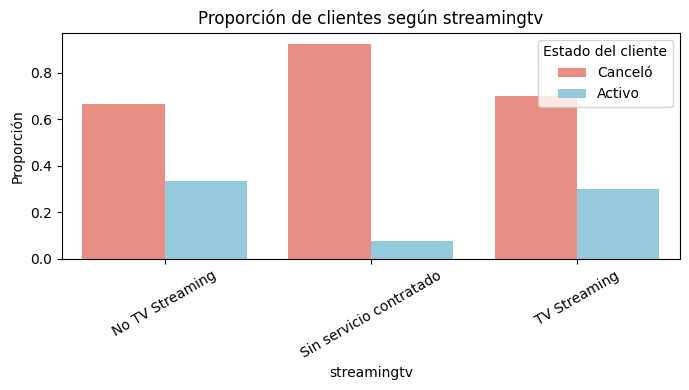

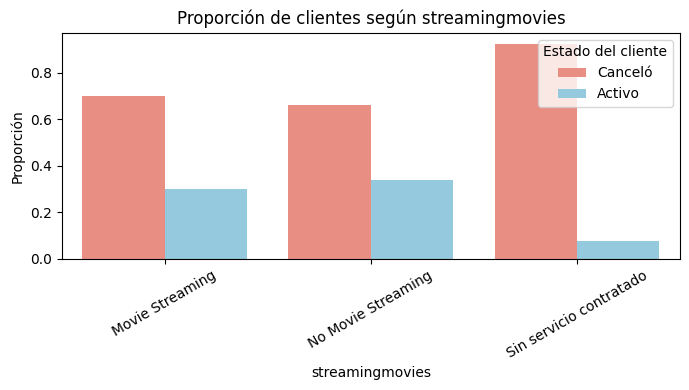

In [60]:
# Primero creamos una copia antes del loop
df_plot = df_normalizado.copy()

##Definimos las columnas binarias
binary_cols = ['seniorcitizen', 'partner', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Diccionario con etiquetas para cada variable binaria
labels_binarias = {
    'seniorcitizen': {0: 'No Senior', 1: 'Senior'},
    'partner': {0: 'No Pareja', 1: 'Tiene Pareja'},
    'deviceprotection': {0: 'Sin Protección', 1: 'Con Protección', 2:'Sin servicio contratado'},
    'techsupport': {0: 'Sin Soporte', 1: 'Con Soporte', 2:'Sin servicio contratado'},
    'streamingtv': {0: 'No TV Streaming', 1: 'TV Streaming', 2:'Sin servicio contratado'},
    'streamingmovies': {0: 'No Movie Streaming', 1: 'Movie Streaming', 2:'Sin servicio contratado'}
}

for col in binary_cols:
    df_plot.loc[:, f'{col}_label'] = df_plot[col].map(labels_binarias[col])

    prop_df = (
        df_plot.groupby(f'{col}_label')['churn']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )
    prop_df = prop_df[prop_df['churn'].isin([0, 1])]

    plt.figure(figsize=(7,4))
    ax = sns.barplot(
        x=f'{col}_label', y='proportion', hue='churn',
        data=prop_df,
        palette=['salmon', 'skyblue'],
        hue_order=[0, 1]
    )

    plt.title(f'Proporción de clientes según {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.xticks(rotation=30)

    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['Canceló', 'Activo'], title='Estado del cliente')

    plt.tight_layout()
    plt.show()


Lo único que podría señalar respecto a las variables que asigné como binarias es que resalta que la mayoría de los que canceló no tenía el internet contratado.

#📄Informe final

🔹 **Introducción:** El objetivo de este reporte yace en la necesidad de identificar porqué los clientes de TelecomX están cancelando el servicio que ofrece la compañia. La tasa de cancelación de clientes es de aproximadamente 73%, lo que indica un problema grave que se pretende resolver a partir del análisis de variables como el costo de los servicios contratados, el tipo de servicios y las características del cliente.

🔹 **Limpieza y Tratamiento de Datos:** Se importó la base de datos .json a través de pandas, los datos fueron normalizados, los nombres de las columnas se pusieron en minusculas y se eliminaron puntos y espacios para facilitar su llamado posterior, el dtype fue modificado por el objeto correcto dependiendo de los datos de cada columna, sicorrespondía a cadena, float o int. En las columnas como chargestotal se reemplazaron los Nan por 0, para futuras operaciones. Se verificó si existían valores faltantes.
Las variables o columnas que tenían contenido de Yes/No fueron modifcadas por 0 = No tiene el Servicio ya fuera streaming, protección etc, 1= Tiene el Servicio o 2 =No contrató el servicio en general, esto para poder posteriormente analizar la información de las columnas de manera más simple.

🔹 **Análisis Exploratorio de Datos:** Primero se definió el porcentaje real de cancelación (73.5%), el cual es realmente alto, y se puede observar en la **Figura 1**, de la sección Carga y Análisis.
Posteriormente se realizaron gráficos de barras para analizar las variables categóricas y numéricas (Figuras 2, 3 y 4).
En la figura 2, observamos que la proporción de hombres y mujeres que tienen y han cancelado el servicio es la misma, por lo que el género no es importante o determinante para mantener el servicio.
Del tipo de internet, la mayoría de los dados de baja no tenían este servicio contratado, pero los que lo tenían, quienes mayormente cancelaron tenían DSL, por lo que hasta el momento, esa podría ser una razón para la cancelación.
Los clientes que tenían contrato a dos años son los que cancelaron el servicio en mayor proporción.
Mientras que hay una mayor fidelidad al servicio para los que tienen contrato mensual.
En lo que respecta a su método de pago, el cheque electrónico es el único que tiene la misma proporción de clientes dados de baja y activos. Pero esta no debería de ser una variable tan decisiva para la decisión de conservar el servicio o no.
Por otro lado, en la figura 3, se observa que los clientes que cancelaron el servicio estaban pagando en promedio más que los clientes que aún conservan el servicio, por lo que, esta podría ser una razón importante para la cancelación. Finalmente, en la figura 5 encontramos respecto a las variables asignadas como 0,1,2 destaca que la mayoría de los que canceló el servicio en general del TelecomX no tenía servicios adicionales contratados como el Streaming, Soporte técnico etc.


🔹 Conclusiones e Insights: El tipo de internet DSL podría no cumplir con las expectativas del cliente, aunado a ello, contratos de dos años parecen ser un factor común en los clientes que cancelan, tal vez no están funcionando este tipo de contratos, además los clientes que cancelaron estan pagando más en total que los clientes que aún permanecen activos y finalmente los clientes con serivicios adicionales tienden a permanecer más con TelecomX comparado con los clientes que han cancelado.

🔹 Recomendaciones: Primero prestaría atención al servicio ofrecido por el internet DSL, verificaría que estuviera funcionando bien y si existen quejas por este.
Trataría de verificar bien los precios de los servicios que estoy ofreciendo, mejorar promociones u ofertas para atraer a los clientes y mantener contentos a los que ya poseo.
Mejoraría el contrato a dos años para determinar si es factible continuar con el o modificarlo por contratos más cortos.
Finalmente promocionaría más los servicios de streaming ya que los clientes que los tenían de manera general permanecían más con TelecomX.
